In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df  = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [75]:
#  Why we fit X_test using X_train scaler?

#Because we assume they share the same distribution as X_train (although they are not always exactly the same),
# and the model it self is trained using the scaled information from X_train.

#X_test is technically unseen data, so we might get them in batches and hence we do not know the actual distribution. 
# When any new data comes in we passed them through the same processing as the training set, fit using X_train.

In [9]:
from tensorflow.keras.models import Sequential

2022-10-09 17:42:07.446355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1) )# Last layer to be a single neuron to produce a single value of price.

model.compile(optimizer= 'rmsprop', loss= 'mse')


2022-10-09 17:42:19.036106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [79]:
# Or we can use this
"""
model = Sequential([Dense(4, activation = 'relu'), 
Dense(2, activation = 'relu'),
Dense(1)])

"""


"\nmodel = Sequential([Dense(4, activation = 'relu'), \nDense(2, activation = 'relu'),\nDense(1)])\n\n"

In [12]:
model.fit(x = X_train, y = y_train, epochs=250, verbose = 2)

Epoch 1/250
22/22 - 0s - loss: 259441.6406 - 314ms/epoch - 14ms/step
Epoch 2/250
22/22 - 0s - loss: 259234.9531 - 13ms/epoch - 571us/step
Epoch 3/250
22/22 - 0s - loss: 259103.9375 - 12ms/epoch - 533us/step
Epoch 4/250
22/22 - 0s - loss: 259006.6094 - 12ms/epoch - 538us/step
Epoch 5/250
22/22 - 0s - loss: 258930.2188 - 12ms/epoch - 553us/step
Epoch 6/250
22/22 - 0s - loss: 258858.2656 - 11ms/epoch - 517us/step
Epoch 7/250
22/22 - 0s - loss: 258784.0000 - 12ms/epoch - 536us/step
Epoch 8/250
22/22 - 0s - loss: 258705.0469 - 11ms/epoch - 484us/step
Epoch 9/250
22/22 - 0s - loss: 258617.5469 - 13ms/epoch - 578us/step
Epoch 10/250
22/22 - 0s - loss: 258517.7188 - 11ms/epoch - 512us/step
Epoch 11/250
22/22 - 0s - loss: 258403.0781 - 11ms/epoch - 514us/step
Epoch 12/250
22/22 - 0s - loss: 258271.5000 - 11ms/epoch - 483us/step
Epoch 13/250
22/22 - 0s - loss: 258121.7188 - 12ms/epoch - 530us/step
Epoch 14/250
22/22 - 0s - loss: 257951.5625 - 11ms/epoch - 498us/step
Epoch 15/250
22/22 - 0s - los

<AxesSubplot:>

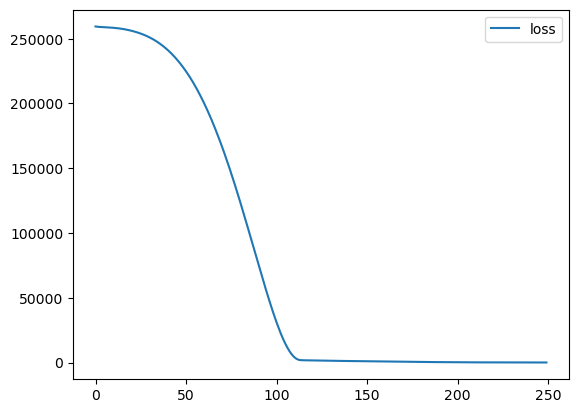

In [13]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [14]:
model.evaluate(X_test, y_test, verbose = 0)
# Shows how good our model does on the test set.

30.958541870117188

In [15]:
test_pred = model.predict(X_test)

10/10 [==============================] - 0s 587us/step


In [84]:
# convert the numpy arr into a pd series:

In [16]:
test_pred = pd.Series(test_pred.reshape(300,))

In [17]:
test_pred

0      655.930847
1      512.701599
2      520.720337
3      487.252136
4      543.635010
          ...    
295    372.872314
296    637.939636
297    397.521179
298    585.926392
299    514.187317
Length: 300, dtype: float32

In [19]:
pred_df = pd.DataFrame(y_test, columns=['True Test Y'])
pred_df

,True Test Y
0,655.391403
1,511.366708
2,515.778446
3,478.358238
4,543.830279
...,...
295,372.777436
296,639.818362
297,403.062564
298,579.428431


In [20]:
pred_df = pd.concat([pred_df, test_pred], axis=1 )

In [22]:
pred_df.columns = ['Test True Y', 'Predicted Y']

In [23]:
pred_df

,Test True Y,Predicted Y
0,655.391403,655.930847
1,511.366708,512.701599
2,515.778446,520.720337
3,478.358238,487.252136
4,543.830279,543.635010
...,...,...
295,372.777436,372.872314
296,639.818362,637.939636
297,403.062564,397.521179
298,579.428431,585.926392


<AxesSubplot:xlabel='Test True Y', ylabel='Predicted Y'>

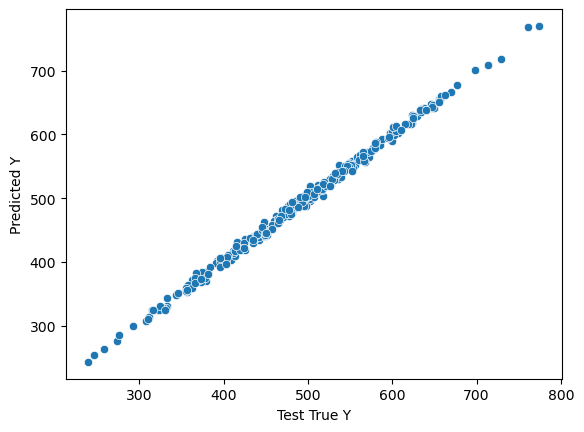

In [27]:
sns.scatterplot(x='Test True Y', y = 'Predicted Y', data = pred_df)
# A straight line means a frikin goo model.

In [29]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(pred_df['Test True Y'], pred_df['Predicted Y'])
# On average, I am about 4 dollars off from real price


4.370185611875076

In [30]:
# Suppose, I found a new gem and I want to find it's price:

In [31]:
new_gem = [[998,1000]]
new_gem = Scaler.transform(new_gem)

In [33]:
model.predict(new_gem, verbose = 0)
#means <-- 422.9 dollars

array([[422.9064]], dtype=float32)

In [34]:
# to save the model
from tensorflow.keras.models import load_model

In [36]:
model.save('my_gem_model.h5')

In [37]:
# We can load this model like
hehe_model =load_model('my_gem_model.h5')

In [40]:
hehe_model.predict(new_gem)
# See, we can use our saved model like this.


1/1 [==============================] - 0s 15ms/step


array([[422.9064]], dtype=float32)